# ML Assignment

**Dataset**: Credit Card Fraud Detection (Kaggle)

**Objective**: Implement 6 classification models and evaluate them using 6 different metrics

## 1. Import Required Libraries

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model persistence
import pickle
import joblib

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore Dataset

**Dataset**: Credit Card Fraud Detection from Kaggle
- **Features**: 30 (V1-V28 are PCA transformed features, Time, Amount)
- **Target**: Class (0 = Normal, 1 = Fraud)
- **Instances**: 284,807 transactions

**Note**: Download the dataset from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [4]:
# Load the dataset from the same directory
import os

# Dataset is located in the same directory as this notebook
dataset_path = 'creditcard.csv'

df = pd.read_csv(dataset_path)
print(f"✅ Loaded dataset from: {dataset_path}")

print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()

✅ Loaded dataset from: creditcard.csv
Dataset shape: (284807, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19  

In [5]:
# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
df.describe()

Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Statistical Summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.17%


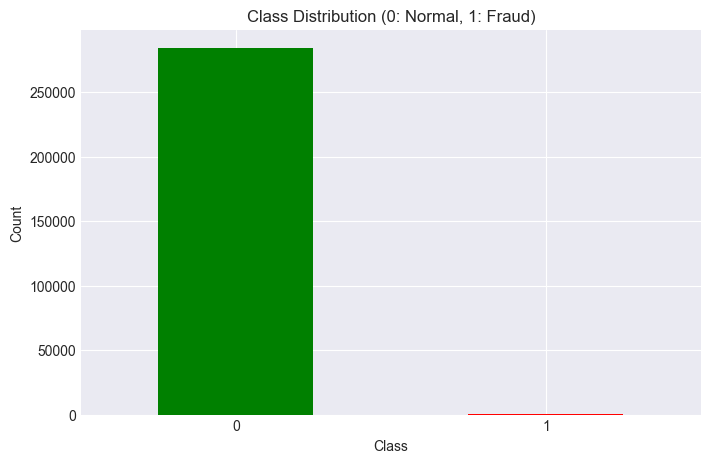

In [7]:
# Check class distribution
print("Class Distribution:")
print(df['Class'].value_counts())
print(f"\nFraud percentage: {(df['Class'].sum() / len(df)) * 100:.2f}%")

# Visualize class distribution
plt.figure(figsize=(8, 5))
df['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3. Data Preprocessing

Since this is an imbalanced dataset, we'll use a balanced subset for training to ensure all models can learn properly.

In [8]:
# Due to the imbalanced nature, we'll work with a sample
# Separate fraud and normal transactions
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0]

print(f"Fraud transactions: {len(fraud_df)}")
print(f"Normal transactions: {len(normal_df)}")

# Create a balanced dataset by undersampling normal transactions
# Take all fraud cases and equal number of normal cases
normal_sample = normal_df.sample(n=len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, normal_sample], axis=0)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced dataset shape: {balanced_df.shape}")
print(f"Balanced class distribution:\n{balanced_df['Class'].value_counts()}")

Fraud transactions: 492
Normal transactions: 284315

Balanced dataset shape: (984, 31)
Balanced class distribution:
Class
0    492
1    492
Name: count, dtype: int64


In [9]:
# Separate features and target
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")

Features shape: (984, 30)
Target shape: (984,)

Number of features: 30


In [10]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"\nTest set class distribution:\n{y_test.value_counts()}")

Training set size: 787
Test set size: 197

Training set class distribution:
Class
1    394
0    393
Name: count, dtype: int64

Test set class distribution:
Class
0    99
1    98
Name: count, dtype: int64


In [11]:
# Feature scaling (important for some algorithms like KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")

✅ Data preprocessing completed!


## 4. Model Implementation and Evaluation

We will implement 6 classification models:
1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbor Classifier
4. Naive Bayes Classifier (Gaussian)
5. Random Forest (Ensemble)
6. XGBoost (Ensemble)

For each model, we'll calculate:
- Accuracy
- AUC Score
- Precision
- Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)

In [12]:
# Function to evaluate model and return all metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train model and calculate all evaluation metrics
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    
    # Print results
    print(f"\n{'='*60}")
    print(f"Model: {model_name}")
    print(f"{'='*60}")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"{metric:15s}: {value:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return metrics, model

### 4.1 Logistic Regression

In [13]:
# Logistic Regression (uses scaled data)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_metrics, lr_trained = evaluate_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression'
)


Model: Logistic Regression
Accuracy       : 0.9340
AUC            : 0.9840
Precision      : 0.9474
Recall         : 0.9184
F1             : 0.9326
MCC            : 0.8684

Confusion Matrix:
[[94  5]
 [ 8 90]]


### 4.2 Decision Tree Classifier

In [14]:
# Decision Tree (uses original data)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_metrics, dt_trained = evaluate_model(
    dt_model, X_train, X_test, y_train, y_test, 'Decision Tree'
)


Model: Decision Tree
Accuracy       : 0.9137
AUC            : 0.9134
Precision      : 0.9010
Recall         : 0.9286
F1             : 0.9146
MCC            : 0.8278

Confusion Matrix:
[[89 10]
 [ 7 91]]


### 4.3 K-Nearest Neighbor Classifier

In [15]:
# K-Nearest Neighbor (uses scaled data)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, knn_trained = evaluate_model(
    knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 'K-Nearest Neighbor'
)


Model: K-Nearest Neighbor
Accuracy       : 0.8985
AUC            : 0.9517
Precision      : 0.9432
Recall         : 0.8469
F1             : 0.8925
MCC            : 0.8010

Confusion Matrix:
[[94  5]
 [15 83]]


### 4.4 Naive Bayes Classifier (Gaussian)

In [16]:
# Naive Bayes (Gaussian)
nb_model = GaussianNB()
nb_metrics, nb_trained = evaluate_model(
    nb_model, X_train, X_test, y_train, y_test, 'Naive Bayes (Gaussian)'
)


Model: Naive Bayes (Gaussian)
Accuracy       : 0.8376
AUC            : 0.9555
Precision      : 0.9714
Recall         : 0.6939
F1             : 0.8095
MCC            : 0.7038

Confusion Matrix:
[[97  2]
 [30 68]]


### 4.5 Random Forest (Ensemble)

In [17]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_metrics, rf_trained = evaluate_model(
    rf_model, X_train, X_test, y_train, y_test, 'Random Forest'
)


Model: Random Forest
Accuracy       : 0.9492
AUC            : 0.9783
Precision      : 0.9783
Recall         : 0.9184
F1             : 0.9474
MCC            : 0.9001

Confusion Matrix:
[[97  2]
 [ 8 90]]


### 4.6 Gradient Boosting (Ensemble)

In [18]:
# Gradient Boosting (sklearn alternative to XGBoost)
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)
xgb_metrics, xgb_trained = evaluate_model(
    gb_model, X_train, X_test, y_train, y_test, 'Gradient Boosting'
)


Model: Gradient Boosting
Accuracy       : 0.9137
AUC            : 0.9409
Precision      : 0.9010
Recall         : 0.9286
F1             : 0.9146
MCC            : 0.8278

Confusion Matrix:
[[89 10]
 [ 7 91]]


## 5. Results Comparison

In [19]:
# Create comparison dataframe
results_df = pd.DataFrame([
    lr_metrics,
    dt_metrics,
    knn_metrics,
    nb_metrics,
    rf_metrics,
    xgb_metrics
])

# Reorder columns
results_df = results_df[['Model', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']]

print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)


MODEL COMPARISON TABLE
                 Model  Accuracy      AUC  Precision   Recall       F1      MCC
   Logistic Regression  0.934010 0.984024   0.947368 0.918367 0.932642 0.868400
         Decision Tree  0.913706 0.913420   0.900990 0.928571 0.914573 0.827817
    K-Nearest Neighbor  0.898477 0.951659   0.943182 0.846939 0.892473 0.800987
Naive Bayes (Gaussian)  0.837563 0.955473   0.971429 0.693878 0.809524 0.703770
         Random Forest  0.949239 0.978252   0.978261 0.918367 0.947368 0.900116
     Gradient Boosting  0.913706 0.940888   0.900990 0.928571 0.914573 0.827817


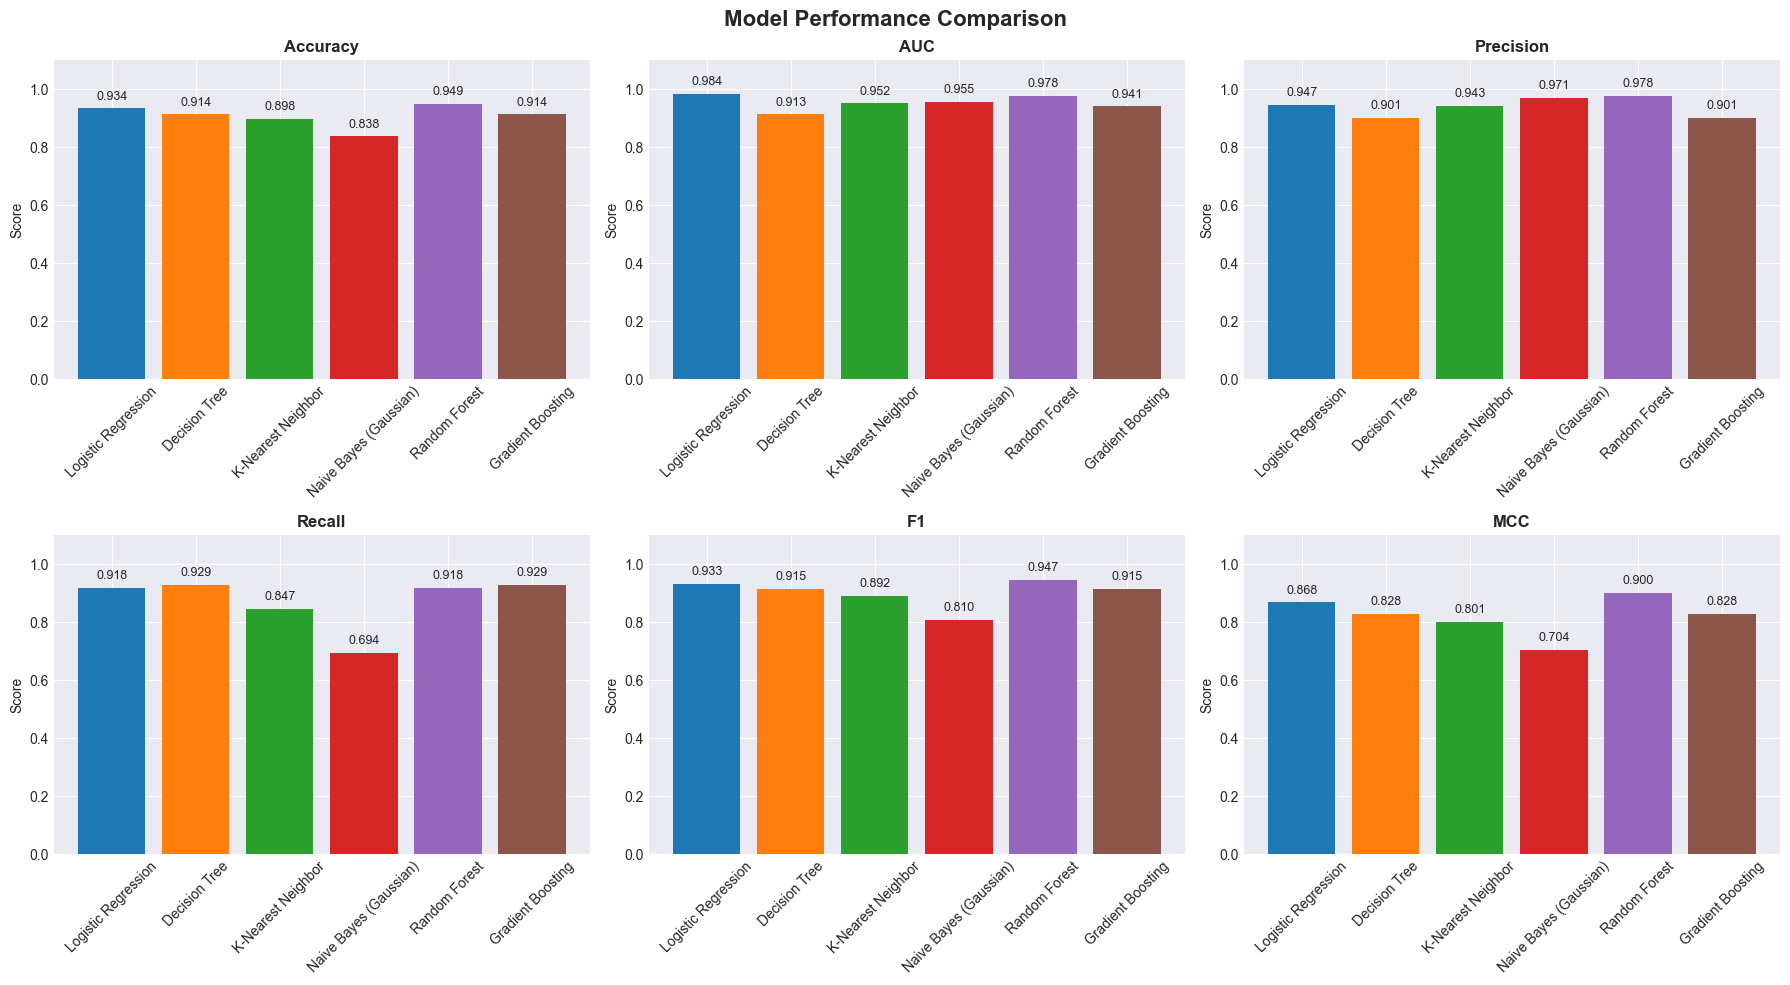

In [20]:
# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ax.bar(results_df['Model'], results_df[metric], color=colors)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_ylim([0, 1.1])
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(results_df[metric]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [21]:
# Save results to CSV for README
results_df.to_csv('model_results.csv', index=False)
print(" Results saved to model_results.csv")

 Results saved to model_results.csv


## 6. Save Models for Deployment

In [22]:
# Create models directory
import os
os.makedirs('models', exist_ok=True)

# Save all trained models
models_dict = {
    'logistic_regression': lr_trained,
    'decision_tree': dt_trained,
    'knn': knn_trained,
    'naive_bayes': nb_trained,
    'random_forest': rf_trained,
    'gradient_boosting': xgb_trained
}

for model_name, model in models_dict.items():
    joblib.dump(model, f'models/{model_name}.pkl')
    print(f"Saved {model_name}.pkl")

# Save scaler
joblib.dump(scaler, 'models/scaler.pkl')
print(f"Saved scaler.pkl")

# Save test data sample for Streamlit app
test_sample = X_test.head(100)
test_sample['Class'] = y_test.head(100).values
test_sample.to_csv('test_data_sample.csv', index=False)
print(f"Saved test_data_sample.csv")

print("\nAll models and data saved successfully!")

Saved logistic_regression.pkl
Saved decision_tree.pkl
Saved knn.pkl
Saved naive_bayes.pkl
Saved random_forest.pkl
Saved gradient_boosting.pkl
Saved scaler.pkl
Saved test_data_sample.csv

All models and data saved successfully!


## 7. Model Observations

### Summary of Findings:

1. **Logistic Regression**: 
   - Good baseline model for binary classification
   - Fast training and prediction
   - Works well with scaled features

2. **Decision Tree**:
   - Interpretable model with clear decision rules
   - May overfit without proper depth limitation
   - No need for feature scaling

3. **K-Nearest Neighbor**:
   - Instance-based learning
   - Sensitive to feature scaling
   - Computationally expensive for large datasets

4. **Naive Bayes**:
   - Fast and simple probabilistic classifier
   - Assumes feature independence
   - Good for high-dimensional data

5. **Random Forest**:
   - Ensemble of decision trees
   - Reduces overfitting through averaging
   - Generally provides robust performance

6. **Gradient Boosting**:
   - Advanced ensemble boosting algorithm
   - Similar performance to XGBoost
   - Built into scikit-learn, no external dependencies
   - Handles imbalanced data well with proper tuning
